In [1]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# import seaborn as sns
# color = sns.color_palette()
# sns.set_style('darkgrid')
# pd.set_option('display.max_columns', 500)

In [1182]:
import pandas as pd 
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt 

import statsmodels.api as sm
import statsmodels.formula.api as smf


import warnings
warnings.filterwarnings("ignore")

# Utilisation de statsmodel pour récupérer les pvalues


In [1183]:
# # Essai avec statsmodele et directement les valeurs catégoriques.  
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# df = pd.read_csv("../data/AmesHousing.csv")
# df_drop_nan = df[df.columns[df.isna().sum() / df.count() < 0.1]].drop(['PID','Order'], axis=1)
# df_drop_nan.columns = df_drop_nan.columns.str.replace(' ', '_').str.replace('/','_').str.replace('1', 'first_').str.replace('2', 'second_').str.replace('3', 'third_')
# df_numerical = df_drop_nan.select_dtypes(['number'])
# df_categories = df_drop_nan.select_dtypes(['object'])

# formula = "SalePrice ~ "
# for c in df_numerical.columns[:-1]:
#     formula += f"{c} + "
# formula += f"{df_numerical.columns[-1]} "
# for c in df_categories.columns:
#     formula += f' + C({c})'
    
# formula

In [1184]:
# Essai avec statsmodele avec les valeurs catégoriques + numérique.
# Reste a faire le concat des pvalues de chaque colonne  


df = pd.read_csv("../data/AmesHousing.csv")
df_drop_nan = df[df.columns[df.isna().sum() / df.count() < 0.1]].drop(['PID','Order'], axis=1).dropna()
df_drop_nan.columns = df_drop_nan.columns.str.replace(' ', '_').str.replace('/','_').str.replace('1', 'first_').str.replace('2', 'second_').str.replace('3', 'third_')
df_numerical = df_drop_nan.select_dtypes(['number'])
df_categories = df_drop_nan.select_dtypes(['object'])

formula = "SalePrice ~ "
for c in df_categories.columns[:-1]:
    formula += f'C({c}) + '
formula += f'C({df_categories.columns[-1]})'

Y = df_numerical['SalePrice']
X = df_numerical.drop('SalePrice', axis=1)
X = sm.add_constant(X)

# Numerical values
model_num = sm.OLS(Y, X).fit()

# Catégorical values
model_cat = smf.ols(formula=formula, data=df_drop_nan).fit()

In [1185]:
s1 = pd.DataFrame(model_cat.pvalues.sort_values()).reset_index().rename(columns={'index': 'column', 0: 'pvalues'})
s2 = pd.DataFrame(model_num.pvalues.sort_values()).reset_index().rename(columns={'index': 'column', 0: 'pvalues'})
df_pvalues = pd.merge(left=s1, right=s2, on=['pvalues','column'], how='outer')
# df_pvalues = df_pvalues[df_pvalues.pvalues < 0.05]
df_pvalues.sort_values(by='pvalues').head(60)

# Gr_Liv_Area - Total_Bsmt_SF -

,column,pvalues
204,Overall_Qual,6.460034e-106
0,C(Bldg_Type)[T.TwnhsE],2.700912e-43
1,C(Kitchen_Qual)[T.TA],1.345519e-34
2,C(Bsmt_Qual)[T.Gd],1.413120e-24
3,C(Kitchen_Qual)[T.Gd],2.895506e-24
4,C(Bldg_Type)[T.Twnhs],2.950173e-24
5,C(Bsmt_Qual)[T.TA],8.984986e-24
205,Misc_Val,2.358463e-17
6,C(Roof_Matl)[T.WdShngl],2.782756e-17
7,C(Exter_Qual)[T.TA],5.652507e-17


In [1186]:
def analyse(col):
    print('number of Nan:', df_drop_nan.Misc_Val.isna().sum())
    print('pvalues:', df_pvalues[df_pvalues.column.str.contains('Bsmt_Qual')])
    df_drop_nan.groupby(col).mean()['SalePrice'].plot()
    plt.show()
    return df_drop_nan[col].value_counts()

number of Nan: 0
pvalues:                  column       pvalues
2    C(Bsmt_Qual)[T.Gd]  1.413120e-24
5    C(Bsmt_Qual)[T.TA]  8.984986e-24
9    C(Bsmt_Qual)[T.Fa]  4.478288e-15
117  C(Bsmt_Qual)[T.Po]  3.112918e-01


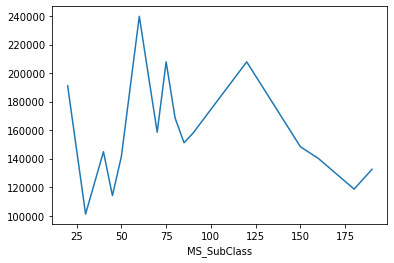

20     1008
60      561
50      259
120     189
160     121
70      118
80      115
30      106
90       60
85       44
190      42
75       21
45       15
180      12
40        6
150       1
Name: MS_SubClass, dtype: int64

In [1187]:
analyse('MS_SubClass')

# Analyse des Pvalues significatives


- Overall_Qual
- Bldg_Type (Type of dwelling)
- Kitchen_Qual
- Bsmt_Qual
- Misc_Val
- Roof_Matl
- Exter_Qual
- MS_SubClass
- BsmtFin_SF_first
- Bsmt_Exposure
- Neighborhood
- Mas_Vnr_Area
- Gr_Liv_Area
- House_Style
- Overall_Cond
- Total_Bsmt_SF
- Year_Built
- Bedroom_AbvGr
- House_Style
- Screen_Porch
- second_nd_Flr_SF
- Kitchen_AbvGr
- Lot_Area
- Year_Remod_Add
- Garage_Cars
- Garage_Qual
- Garage_Cond
- TotRms_AbvGrd
- Lot_Config
- Heating
- Central_Air
- MS_Zoning


In [1188]:
def plot_count_and_mean(col):
    df_drop_nan.groupby(col).count()['SalePrice'].plot(title='Count')
    plt.show()
    df_drop_nan.groupby(col).mean()['SalePrice'].plot(title='Mean price')
    plt.show()
    return df_drop_nan.groupby(col).count()['SalePrice']
    # Peu exploitable également

# Test modèle avec ces features


In [1189]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, RobustScaler, StandardScaler

Les p-values les plus significatif

- Overall_Qual
- Bldg_Type (Type of dwelling)
- Kitchen_Qual
- Bsmt_Qual
- Misc_Val
- Roof_Matl
- Exter_Qual
- MS_SubClass
- BsmtFin_SF_first
- Bsmt_Exposure
- Neighborhood
- Mas_Vnr_Area
- Gr_Liv_Area
- House_Style
- Overall_Cond
- Total_Bsmt_SF
- Year_Built
- Bedroom_AbvGr
- House_Style
- Screen_Porch
- second_nd_Flr_SF
- Kitchen_AbvGr
- Lot_Area
- Year_Remod_Add
- Garage_Cars
- Garage_Qual
- Garage_Cond
- TotRms_AbvGrd
- Lot_Config
- Heating
- Central_Air
- MS_Zoning
- Heating_QC


In [1190]:
def neighbors_and_conditions_dict(df):
    neighbors_dict = {}
    for idx, value in enumerate(list(df.groupby('Neighborhood').mean()['SalePrice'].sort_values(ascending=True).index)):
        neighbors_dict[value] = idx 
    return neighbors_dict

In [1200]:
def data_preprocessing(df ):

    df['surface_total'] = df['Total_Bsmt_SF'] + df['Gr_Liv_Area'] + df['first_st_Flr_SF'] + df['second_nd_Flr_SF'] + df['Garage_Area'] + df['BsmtFin_SF_first_'] + df['BsmtFin_SF_second_']
    
    df['top_score'] = 0 
    df.loc[ (df.Overall_Cond >= 3) & (df.surface_total >= 5000),'top_score'] += 1 
    df.loc[ (df.Overall_Cond >= 5) & (df.surface_total >= 5000),'top_score'] += 2
    df.loc[ (df.Overall_Qual >= 3) & (df.surface_total >= 5000),'top_score'] += 1 
    df.loc[ (df.Overall_Qual >= 5) & (df.surface_total >= 5000),'top_score'] += 2 
    df.loc[ (df.Kitchen_Qual.isin(['Gd','Ex'])) & (df.surface_total >= 5000),'top_score'] += 2
    df.loc[ (df.Exter_Qual.isin(['Gd','Ex'])) & (df.surface_total >= 5000),'top_score'] += 2
    df.loc[ (df.Neighborhood.isin(['NoRidge','GrnHill','StoneBr','NridgHt'])) & (df.surface_total >= 5000),'top_score'] += 2
    
    return df

In [ ]:
# R2 score on train data:  0.8803967445283223
# R2 score on test data:  0.9049276057860192
# MAE on train data:  15928.622927025448
# MAE on test data:  15890.197824817762

# def data_preprocessing(df ):

#     df['surface_total'] = df['Total_Bsmt_SF'] + df['Gr_Liv_Area'] + df['first_st_Flr_SF'] + df['second_nd_Flr_SF'] + df['Garage_Area'] + df['BsmtFin_SF_first_'] + df['BsmtFin_SF_second_']
    
#     df['top_score'] = 0 
#     # Overall_Cond va de 1 à 7 
    
#     df.loc[ (df.Overall_Cond >= 1) & (df.Overall_Cond <= 2) & (df.surface_total <= 4500),'top_score'] += 1 
#     df.loc[ (df.Overall_Cond > 2) & (df.Overall_Cond <= 4) & (df.surface_total <= 4500),'top_score'] += 2
#     df.loc[ (df.Overall_Cond >= 5) & (df.surface_total <= 4500),'top_score'] += 3
    
#     df.loc[ (df.Overall_Cond >= 1) & (df.Overall_Cond <= 2) & (df.surface_total > 4500),'top_score'] += 3
#     df.loc[ (df.Overall_Cond > 2) & (df.Overall_Cond <= 4) & (df.surface_total > 4500),'top_score'] += 4
#     df.loc[ (df.Overall_Cond >= 5) & (df.surface_total > 4500),'top_score'] += 5
    
#     #Overall_Qual va de 2 à 10 
#     df.loc[ (df.Overall_Qual >= 1) & (df.Overall_Qual <= 4) & (df.surface_total <= 4500),'top_score'] += 1 
#     df.loc[ (df.Overall_Qual >= 5) & (df.surface_total <= 4500),'top_score'] += 2
    
#     df.loc[ (df.Overall_Qual >= 1) & (df.Overall_Qual <= 4) & (df.surface_total > 4500),'top_score'] += 2
#     df.loc[ (df.Overall_Qual >= 5) & (df.surface_total > 4500),'top_score'] += 3

#     df.loc[ (df.Kitchen_Qual.isin(['Gd','Ex'])) & (df.surface_total < 4500),'top_score'] += 1
#     df.loc[ (df.Kitchen_Qual.isin(['Gd','Ex'])) & (df.surface_total >= 4500),'top_score'] += 2
    
#     df.loc[ (df.Exter_Qual.isin(['Gd','Ex'])) & (df.surface_total < 4500),'top_score'] += 1
#     df.loc[ (df.Exter_Qual.isin(['Gd','Ex'])) & (df.surface_total >= 4500),'top_score'] += 2
    
#     df.loc[ (df.Neighborhood.isin(['NoRidge','GrnHill','StoneBr','NridgHt'])) & (df.surface_total < 4500),'top_score'] += 1
#     df.loc[ (df.Neighborhood.isin(['NoRidge','GrnHill','StoneBr','NridgHt'])) & (df.surface_total < 4500) & (df.Overall_Cond > 2) ,'top_score'] += 2
#     df.loc[ (df.Neighborhood.isin(['NoRidge','GrnHill','StoneBr','NridgHt'])) & (df.surface_total < 4500) & (df.Overall_Cond > 4) ,'top_score'] += 3
    
#     df.loc[ (df.Neighborhood.isin(['NoRidge','GrnHill','StoneBr','NridgHt'])) & (df.surface_total >= 4500) ,'top_score'] += 2
#     df.loc[ (df.Neighborhood.isin(['NoRidge','GrnHill','StoneBr','NridgHt'])) & (df.surface_total >= 4500) & (df.Overall_Cond > 2) ,'top_score'] += 3
#     df.loc[ (df.Neighborhood.isin(['NoRidge','GrnHill','StoneBr','NridgHt'])) & (df.surface_total >= 4500) & (df.Overall_Cond > 4) ,'top_score'] += 4
    
#     return df

In [106]:
# R2 score on train data:  0.8809391869243607
# R2 score on test data:  0.9037917720888788
# MAE on train data:  15893.856578316838
# MAE on test data:  16048.401389627092

# def data_preprocessing(df ):

#     df['surface_total'] = df['Total_Bsmt_SF'] + df['Gr_Liv_Area'] + df['first_st_Flr_SF'] + df['second_nd_Flr_SF'] + df['Garage_Area'] + df['BsmtFin_SF_first_'] + df['BsmtFin_SF_second_']
    
#     df['top_score'] = 0 
#     # Overall_Cond va de 1 à 7 
    
    
    
#     df.loc[ (df.Overall_Cond >= 1) & (df.Overall_Cond <= 2) & (df.surface_total <= 5000),'top_score'] += 1 
#     df.loc[ (df.Overall_Cond > 2) & (df.Overall_Cond <= 4) & (df.surface_total <= 5000),'top_score'] += 2
#     df.loc[ (df.Overall_Cond >= 5) & (df.surface_total <= 5000),'top_score'] += 2
    
#     df.loc[ (df.Overall_Cond >= 1) & (df.Overall_Cond <= 2) & (df.surface_total > 5000),'top_score'] += 3
#     df.loc[ (df.Overall_Cond > 2) & (df.Overall_Cond <= 4) & (df.surface_total > 5000),'top_score'] += 4
#     df.loc[ (df.Overall_Cond >= 5) & (df.surface_total > 5000),'top_score'] += 5

    
#     #Overall_Qual va de 2 à 10 
#     df.loc[ (df.Overall_Qual >= 1) & (df.Overall_Qual <= 4) & (df.surface_total < 5000),'top_score'] += 1 
#     df.loc[ (df.Overall_Qual >= 5) & (df.surface_total < 5000),'top_score'] += 2
    
#     df.loc[ (df.Overall_Qual >= 1) & (df.Overall_Qual <= 4) & (df.surface_total >= 5000),'top_score'] += 3
#     df.loc[ (df.Overall_Qual >= 5) & (df.surface_total >= 5000),'top_score'] += 4

#     df.loc[ (df.Kitchen_Qual.isin(['Gd','Ex'])) & (df.surface_total < 5000),'top_score'] += 1
#     df.loc[ (df.Kitchen_Qual.isin(['Gd','Ex'])) & (df.surface_total >= 5000),'top_score'] += 2
    
#     df.loc[ (df.Exter_Qual.isin(['Gd','Ex'])) & (df.surface_total < 5000),'top_score'] += 1
#     df.loc[ (df.Exter_Qual.isin(['Gd','Ex'])) & (df.surface_total >= 5000),'top_score'] += 2
    
#     df.loc[ (df.Neighborhood.isin(['NoRidge','GrnHill','StoneBr','NridgHt'])) & (df.surface_total < 5000),'top_score'] += 1
#     df.loc[ (df.Neighborhood.isin(['NoRidge','GrnHill','StoneBr','NridgHt'])) & (df.surface_total >= 5000),'top_score'] += 2
    
#     return df

In [ ]:
# # R2 score on train data:  0.8790857714678234
# # R2 score on test data:  0.900223145943381
# # MAE on train data:  15998.986681714872
# # MAE on test data:  16255.288544927154

# # -- Cross-validation r2 score 0.9077231735455353
# # -- Cross-validation mean score 16716.217698868033

# def data_preprocessing(df, dico ):
    
#     dict_po_to_ex = { 'Po': 0, 'Fa': 1, 'TA': 2, "Gd": 3, "Ex": 4 }
    

#     df['surface_total'] = df['Total_Bsmt_SF'] + (2 * df['Gr_Liv_Area']) + (1.5 * df['first_st_Flr_SF']) + df['second_nd_Flr_SF'] + df['BsmtFin_SF_first_']

#     df['Exter_Qual'] = df['Exter_Qual'].replace(dict_po_to_ex) 
#     df['Exter_Qual'] = df['Exter_Qual'].astype(int)
    
#     df['Kitchen_Qual'] = df['Kitchen_Qual'].replace(dict_po_to_ex) 
#     df['Kitchen_Qual'] = df['Kitchen_Qual'].astype(int)
    
#     df['score_conditions'] = (2 *df['Overall_Cond']) + df['Overall_Qual'] + 0.6 * df['Kitchen_Qual'] + 0.8 * df['Exter_Qual']
    
#     return df

In [760]:
def neighbors_and_conditions_dict(df):
    neighbors_dict = {}
    for idx, value in enumerate(list(df.groupby('Neighborhood').mean()['SalePrice'].sort_values(ascending=True).index)):
        neighbors_dict[value] = idx 
    return neighbors_dict

In [1244]:
def data_preprocessing(df ):
    
    dict_po_to_ex = { 'Po': 0, 'Fa': 1, 'TA': 2, "Gd": 3, "Ex": 4 }
    
    df['Exter_Qual'] = df['Exter_Qual'].replace(dict_po_to_ex) 
    df['Exter_Qual'] = df['Exter_Qual'].astype(int)
    
    df['Kitchen_Qual'] = df['Kitchen_Qual'].replace(dict_po_to_ex) 
    df['Kitchen_Qual'] = df['Kitchen_Qual'].astype(int)
    
    df['score_conditions'] = 2 * df['Overall_Cond'] + df['Overall_Qual'] + 0.8 * df['Exter_Qual'] + 0.6 * df['Kitchen_Qual']
    
    df['surface_total'] = df['Total_Bsmt_SF'] + df['Gr_Liv_Area'] + df['first_st_Flr_SF'] + df['second_nd_Flr_SF'] + df['BsmtFin_SF_first_']
    return df

In [1435]:
def data_preprocessing(df, dico_neigbhors ):
    
    
    df['Neighborhood'] = df['Neighborhood'].replace(dico_neigbhors)
    df['Neighborhood'] = df['Neighborhood'].astype(int)
    
    dict_po_to_ex = { 'Po': 0, 'Fa': 1, 'TA': 2, "Gd": 3, "Ex": 4 }
    df['Exter_Qual'] = df['Exter_Qual'].replace(dict_po_to_ex) 
    df['Exter_Qual'] = df['Exter_Qual'].astype(int)
    
    df['Kitchen_Qual'] = df['Kitchen_Qual'].replace(dict_po_to_ex) 
    df['Kitchen_Qual'] = df['Kitchen_Qual'].astype(int)
    
    df['score_conditions'] = 1.8 * df['Overall_Cond'] + 2 * df['Overall_Qual'] + 0.8 * df['Exter_Qual'] + 0.6 * df['Kitchen_Qual'] 
    
    df['surface_total'] = df['Total_Bsmt_SF'] + df['Gr_Liv_Area'] + df['first_st_Flr_SF'] + df['second_nd_Flr_SF'] + df['BsmtFin_SF_first_']
    
    df['main_score'] = df['Neighborhood'] * df['surface_total'] * df['score_conditions']
    
    return df

In [1436]:
# Essai avec statsmodele avec les valeurs catégoriques + numérique.
# Reste a faire le concat des pvalues de chaque colonne  

df = pd.read_csv("../data/AmesHousing.csv")
df_drop_nan = df[df.columns[df.isna().sum() / df.count() < 0.1]].drop(['PID','Order'], axis=1).dropna()
df_drop_nan.columns = df_drop_nan.columns.str.replace(' ', '_').str.replace('/','_').str.replace('1', 'first_').str.replace('2', 'second_').str.replace('3', 'third_')

dico_neigbhors = neighbors_and_conditions_dict(df_drop_nan)
df_drop_nan = data_preprocessing(df_drop_nan, dico_neigbhors)
df_numerical = df_drop_nan.select_dtypes(['number'])
df_categories = df_drop_nan.select_dtypes(['object'])

formula = "SalePrice ~ "
# for c in df_numerical.columns:
#     formula += f"{c} + "
for c in df_categories.columns[:-1]:
    formula += f'C({c}) + '
formula += f'C({df_categories.columns[-1]})'

Y = df_numerical['SalePrice']
X = df_numerical.drop('SalePrice', axis=1)
X = sm.add_constant(X)

# Numerical values
model_num = sm.OLS(Y, X).fit()

# Catégorical values
model_cat = smf.ols(formula=formula, data=df_drop_nan).fit()

s1 = pd.DataFrame(model_cat.pvalues.sort_values()).reset_index().rename(columns={'index': 'column', 0: 'pvalues'})
s2 = pd.DataFrame(model_num.pvalues.sort_values()).reset_index().rename(columns={'index': 'column', 0: 'pvalues'})
df_pvalues = pd.merge(left=s1, right=s2, on=['pvalues','column'], how='outer')
df_pvalues = df_pvalues[df_pvalues.pvalues < 0.05]
df_pvalues.sort_values(by='pvalues').head(60)


,column,pvalues
170,main_score,4.866339e-257
171,Neighborhood,4.444768e-95
0,C(Bsmt_Qual)[T.Gd],2.409409e-92
1,C(Bsmt_Qual)[T.TA],1.744631e-91
2,C(Bsmt_Qual)[T.Fa],3.067997e-44
172,score_conditions,2.074845e-34
3,C(Bldg_Type)[T.TwnhsE],7.868449e-24
4,C(House_Style)[T.SFoyer],1.522322e-21
173,Screen_Porch,4.092019e-18
5,C(House_Style)[T.SLvl],1.422021e-16


In [1459]:
def data_preprocessing(df, dico_neigbhors ):
    
    
    df['Neighborhood'] = df['Neighborhood'].replace(dico_neigbhors)
    df['Neighborhood'] = df['Neighborhood'].astype(int)
    
    dict_po_to_ex = { 'Po': 0, 'Fa': 1, 'TA': 2, "Gd": 3, "Ex": 4 }
    df['Exter_Qual'] = df['Exter_Qual'].replace(dict_po_to_ex) 
    df['Exter_Qual'] = df['Exter_Qual'].astype(int)
    
    df['Kitchen_Qual'] = df['Kitchen_Qual'].replace(dict_po_to_ex) 
    df['Kitchen_Qual'] = df['Kitchen_Qual'].astype(int)
    
    df['score_conditions'] = 1.8 * df['Overall_Cond'] + 2 * df['Overall_Qual'] + 0.8 * df['Exter_Qual'] + 0.6 * df['Kitchen_Qual'] 
    
    df['surface_total'] = df['Total_Bsmt_SF'] + df['Gr_Liv_Area'] + df['first_st_Flr_SF'] + df['second_nd_Flr_SF'] + df['BsmtFin_SF_first_']
    
    df['main_score'] = df['Neighborhood'] * df['surface_total'] * df['score_conditions']
    
    return df

In [1460]:
to_keep = ['Neighborhood', 'Overall_Cond', 'Overall_Qual', 'Kitchen_Qual', 'Exter_Qual', 'Garage_Cars',
            'Misc_Val', 'MS_SubClass', 'surface_total', 'score_conditions', 'main_score',
            'SalePrice']

# Import data
df = pd.read_csv("../data/AmesHousing.csv")
df_drop_nan = df[df.columns[df.isna().sum() / df.count() < 0.1]].drop(['PID','Order'], axis=1)
df_drop_nan.columns = df_drop_nan.columns.str.replace(' ', '_').str.replace('/','_').str.replace('1', 'first_').str.replace('2', 'second_').str.replace('3', 'third_')

# Surface total dont surface basement Finished 
df_drop_nan = df_drop_nan.dropna()

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(df_drop_nan, df_drop_nan.SalePrice, test_size=0.2, random_state=42)
dico_neigbhors = neighbors_and_conditions_dict(X_train)
X_train = data_preprocessing(X_train, dico_neigbhors)[to_keep]
X_test = data_preprocessing(X_test, dico_neigbhors)[to_keep]

X_train

,Neighborhood,Overall_Cond,Overall_Qual,Kitchen_Qual,Exter_Qual,Garage_Cars,Misc_Val,MS_SubClass,surface_total,score_conditions,main_score,SalePrice
2571,11,7,6,2,2,2.0,0,20,3024.0,27.4,911433.6,135000
2514,21,5,7,3,3,1.0,0,60,3957.0,27.2,2260238.4,200000
1663,11,5,6,2,2,2.0,0,20,3225.0,23.8,844305.0,143250
1089,15,5,7,3,3,2.0,0,60,4280.0,27.2,1746240.0,188000
72,14,5,7,3,3,2.0,0,60,5780.0,27.2,2201024.0,233000
...,...,...,...,...,...,...,...,...,...,...,...,...
1787,21,5,8,3,3,2.0,0,20,5383.0,29.2,3300855.6,260000
1187,13,5,6,2,2,2.0,0,20,5521.0,23.8,1708197.4,150000
1225,11,8,5,3,2,1.0,0,20,3278.0,27.8,1002412.4,141500
1415,5,5,5,2,2,1.0,0,190,4532.0,21.8,493988.0,125000


In [1461]:
def analyse(col):
    print('number of Nan:', X_train.Misc_Val.isna().sum())
    print('pvalues:', df_pvalues[df_pvalues.column.str.contains(col)])
    X_train.groupby(col).mean()['SalePrice'].plot()
    plt.show()
    return X_train[col].value_counts()

number of Nan: 0
pvalues:          column        pvalues
170  main_score  4.866339e-257


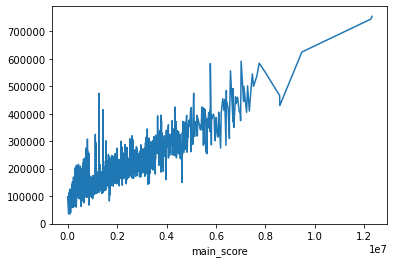

0.0          18
1454241.6     3
2731394.4     3
596768.0      3
385322.0      3
             ..
3023076.0     1
1026718.0     1
3227709.6     1
5637758.4     1
193852.8      1
Name: main_score, Length: 2090, dtype: int64

In [1462]:
analyse('main_score')

In [1278]:
# form 

# ------------------------------------
# surface_total (include garage, ground and stairs)
# Quartier 
# Overall condition 
# Overall Quality 
# Kitchen Quality 
# Exter Quality 
# Misc Val 
# Cars in Garage 
# surface terminé du garage ()
# MS_SubClass 
# -----------------------------------

In [1447]:
# R2 score on train data:  0.9115520337528904
# R2 score on test data:  0.920022778592911
# MAE on train data:  15194.133138746649
# MAE on test data:  15618.58395718177

# -- Cross-validation r2 score 0.9203502847034392
# -- Cross-validation mean score 16200.426802658674

# def data_preprocessing(df, dico_neigbhors ):
    
    
#     df['Neighborhood'] = df['Neighborhood'].replace(dico_neigbhors)
#     df['Neighborhood'] = df['Neighborhood'].astype(int)
    
#     dict_po_to_ex = { 'Po': 0, 'Fa': 1, 'TA': 2, "Gd": 3, "Ex": 4 }
#     df['Exter_Qual'] = df['Exter_Qual'].replace(dict_po_to_ex) 
#     df['Exter_Qual'] = df['Exter_Qual'].astype(int)
    
#     df['Kitchen_Qual'] = df['Kitchen_Qual'].replace(dict_po_to_ex) 
#     df['Kitchen_Qual'] = df['Kitchen_Qual'].astype(int)
    
#     df['score_conditions'] = 1.8 * df['Overall_Cond'] + 2 * df['Overall_Qual'] + 0.8 * df['Exter_Qual'] + 0.6 * df['Kitchen_Qual'] 
    
#     df['surface_total'] = df['Total_Bsmt_SF'] + df['Gr_Liv_Area'] + df['first_st_Flr_SF'] + df['second_nd_Flr_SF'] + df['BsmtFin_SF_first_']
    
#     df['main_score'] = df['Neighborhood'] * df['surface_total'] * df['score_conditions']
    
#     return df

In [1478]:
to_keep = ['Neighborhood', 'Overall_Cond', 'Overall_Qual', 'Kitchen_Qual', 'Exter_Qual', 'Garage_Cars',
            'Misc_Val', 'MS_SubClass', 'surface_total', 'score_conditions', 'main_score',
            'SalePrice']

# Import data
df = pd.read_csv("../data/AmesHousing.csv")
df_drop_nan = df[df.columns[df.isna().sum() / df.count() < 0.1]].drop(['PID','Order'], axis=1)
df_drop_nan.columns = df_drop_nan.columns.str.replace(' ', '_').str.replace('/','_').str.replace('1', 'first_').str.replace('2', 'second_').str.replace('3', 'third_')

# # Surface total dont surface basement Finished 
# df_drop_nan = df_drop_nan.dropna()

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(df_drop_nan, df_drop_nan.SalePrice, test_size=0.2, random_state=42)
neighbors_dico = neighbors_and_conditions_dict(X_train)

X_train = data_preprocessing(X_train, neighbors_dico)[to_keep].drop(['SalePrice'], axis=1)
X_test = data_preprocessing(X_test, neighbors_dico)[to_keep].drop(['SalePrice'], axis=1)
X_train[X_train.Garage_Cars.isna()]

,Neighborhood,Overall_Cond,Overall_Qual,Kitchen_Qual,Exter_Qual,Garage_Cars,Misc_Val,MS_SubClass,surface_total,score_conditions,main_score
2236,1,6,5,3,2,NaN,0,70,5063.0,24.2,122524.6


In [1507]:
to_keep = ['Neighborhood', 'Overall_Cond', 'Overall_Qual', 'Kitchen_Qual', 'Exter_Qual', 'Garage_Cars',
            'Misc_Val', 'MS_SubClass', 'surface_total', 'score_conditions', 'main_score',
            'SalePrice']

# Import data
df = pd.read_csv("../data/AmesHousing.csv")
df_drop_nan = df[df.columns[df.isna().sum() / df.count() < 0.1]].drop(['PID','Order'], axis=1)
df_drop_nan.columns = df_drop_nan.columns.str.replace(' ', '_').str.replace('/','_').str.replace('1', 'first_').str.replace('2', 'second_').str.replace('3', 'third_')

# Surface total dont surface basement Finished 
df_drop_nan = df_drop_nan.dropna()

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(df_drop_nan, df_drop_nan.SalePrice, test_size=0.2, random_state=42)
neighbors_dico = neighbors_and_conditions_dict(X_train)

X_train = data_preprocessing(X_train, neighbors_dico)[to_keep].drop(['SalePrice'], axis=1)
X_test = data_preprocessing(X_test, neighbors_dico)[to_keep].drop(['SalePrice'], axis=1)

# Models pipelines and features selections for each pipeline 
pipelines_1 = make_pipeline(StandardScaler())
pipelines_2 = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

numerique_cols = ['surface_total','score_conditions','main_score']
categorical_cols = list(X_train.columns.drop(numerique_cols))

# Apply preprocessing and fit 
preprocessing_model = make_column_transformer((pipelines_1, numerique_cols), 
                                              (pipelines_2, categorical_cols), 
                                              )
model = make_pipeline(preprocessing_model, LinearRegression())
model.fit(X_train, y_train)

# Models scoring
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)
print('R2 score on train data: ', model.score(X_train, y_train))
print('R2 score on test data: ', model.score(X_test, y_test))
print('MAE on train data: ', mean_absolute_error(y_train, predict_train))
print('MAE on test data: ',  mean_absolute_error(y_test, predict_test))

from sklearn.model_selection import cross_val_score

r2_score = cross_val_score(model, X_test, y_test, cv=10, scoring='r2')
mae_score = cross_val_score(model, X_test, y_test, cv=10, scoring='neg_mean_absolute_error')
print('\n-- Cross-validation r2 score', r2_score.mean())
print('-- Cross-validation mean score', np.abs(mae_score.mean()))

# R2 score on train data:  0.9115520337528904
# R2 score on test data:  0.920022778592911
# MAE on train data:  15194.133138746649
# MAE on test data:  15618.58395718177

# -- Cross-validation r2 score 0.9203502847034392
# -- Cross-validation mean score 16200.426802658674

R2 score on train data:  0.9115520337528904
R2 score on test data:  0.920022778592911
MAE on train data:  15194.133138746649
MAE on test data:  15618.58395718177

-- Cross-validation r2 score 0.9203502847034392
-- Cross-validation mean score 16200.426802658674


In [1508]:
from joblib import dump
dump(model, "../fit/model_16200.joblib")

['../fit/model_16200.joblib']

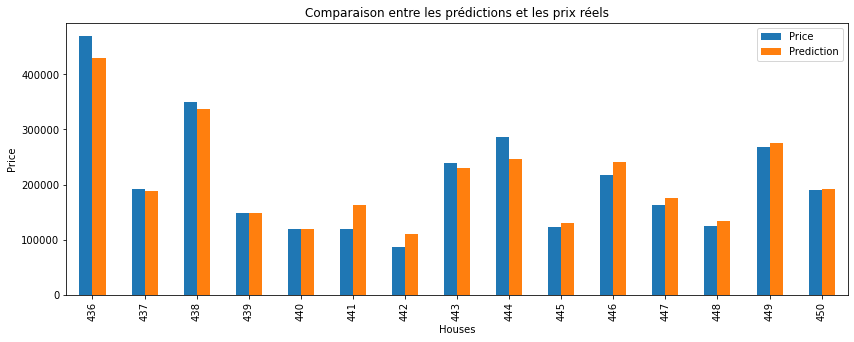

In [1506]:
df_pred = pd.DataFrame(predict_test, y_test).reset_index()
df_pred.columns = ['Price', 'Prediction']
random = np.random.randint(0,df_pred.shape[0])
df_pred[random:random+15].plot.bar( figsize=(14,5))
plt.title('Comparaison entre les prédictions et les prix réels')
plt.xlabel('Houses')
plt.ylabel('Price')
plt.show()